<a href="https://colab.research.google.com/github/prahlad-pallav/Stock_Market_Analysis/blob/main/Polynomial_Regrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Polynomial Regression**

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Step 1: Get Nifty 50 data
df = yf.download("^NSEI", start="2020-01-01", end="2024-01-01")
df = df[['Close']].dropna()

/tmp/ipython-input-2-2308029588.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^NSEI", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
# Step 2: Create day numbers as X
df['Days'] = np.arange(len(df))

In [4]:
# Step 3: Prepare features and target
X = df[['Days']]  # Feature
y = df['Close']   # Target

In [5]:
# Step 4: Transform to polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [6]:
# Step 5: Fit polynomial regression
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [7]:
# Step 6: Predict
df['Predicted_Close'] = model.predict(X_poly)

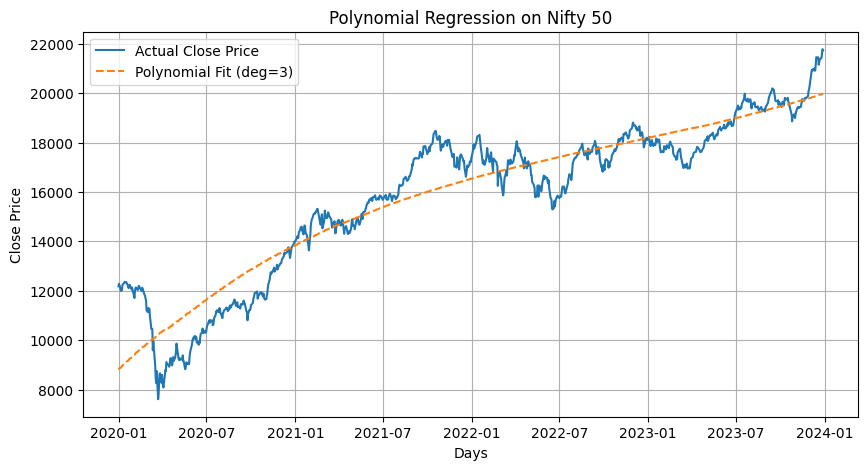

In [8]:
# Step 7: Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual Close Price')
plt.plot(df['Predicted_Close'], label='Polynomial Fit (deg=3)', linestyle='--')
plt.title("Polynomial Regression on Nifty 50")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()